In [54]:
import nengo
import matplotlib.pyplot as plt
import numpy as np

In [70]:
dt = .001

class Delay(object):
  def __init__(self, dimensions, timesteps):
    self.history = np.zeros((timesteps, dimensions))
    print(self.history.shape)
  def step(self, t, x):
    self.history = np.roll(self.history, -1, 0)
    self.history[-1] = x
    return self.history[0]

def delayed_connection(pre, post, delay, transform, synapse):
  with net:
    delayNode = nengo.Node(Delay(pre.n_neurons, int((delay/1000.) / dt)).step, 
                            size_in=pre.n_neurons, 
                            size_out=pre.n_neurons)

    pre_to_delay = nengo.Connection(pre.neurons, delayNode, 
                                    transform=np.ones((pre.n_neurons)),
                                    synapse=None)

    delay_to_post = nengo.Connection(delayNode, post.neurons, 
                                      transform=transform, 
                                      synapse=synapse)

    return {'pre_to_delay':pre_to_delay, 'delay_to_post':delay_to_post}

In [71]:
net = nengo.Network()

def f_in(t):
    return 100 if t>0.2 else 0

with net:
    
    Ie = nengo.Node(f_in)
    
    A = 100
    A = nengo.Ensemble(n_A, 1, encoders=np.ones((n_A,1)), 
                              gain=np.ones((n_A)), 
                              bias=np.zeros((n_A)))
    
    # Ie -> A
    nengo.Connection(Ie, A)
    
    n_B = 100
    B = nengo.Ensemble(n_B, 1, encoders=np.ones((n_B,1)), 
                              gain=np.ones((n_B)), 
                              bias=np.zeros((n_B)))
    
    # A -> B
    delayed_connection(A, B, 200, np.ones((A.n_neurons, B.n_neurons)), None)
    
    
    raster_A = nengo.Probe(A.neurons, 'output')
    raster_B = nengo.Probe(B.neurons, 'output')
    
with nengo.Simulator(net, dt=dt) as sim:
    sim.run(0.5)

(200, 100)
Build finished in 0:00:01.                                                      
Simulation finished in 0:00:01.                                                 


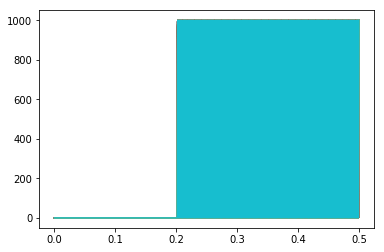

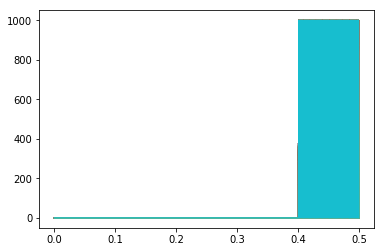

In [72]:
plt.plot(sim.trange(), sim.data[raster_A])
plt.show()

plt.plot(sim.trange(), sim.data[raster_B])
plt.show()